In [1]:
import numpy as np 
import pandas as pd
import plotly.graph_objects as go
import datetime
from datetime import timedelta
import requests

In [2]:
import os
from IPython.display import Image

In [3]:
today = pd.to_datetime('today').strftime("%m-%d-%Y")
daybefore = (datetime.date.today() - timedelta(days=1)).strftime("%m-%d-%Y")
print(today)
print(daybefore)

04-11-2020
04-10-2020


In [4]:
url_today='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + today + '.csv'
url_daybefore='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + daybefore + '.csv'
print(url_today)
print(url_daybefore)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-11-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-10-2020.csv


In [5]:
request = requests.get(url_today)
if request.status_code == 200:
    url = url_today
    date = pd.to_datetime('today').strftime('%d.%m.%Y')
    date2 = datetime.date.today().strftime('%Y%m%d')
else:
    url = url_daybefore
    date = (datetime.date.today() - timedelta(days=1)).strftime('%d.%m.%Y')
    date2 = (datetime.date.today() - timedelta(days=1)).strftime('%Y%m%d')
    
print(url)
print(date)
print(date2)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-10-2020.csv
10.04.2020
20200410


In [6]:
world = pd.read_csv(url)
world

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-10 22:54:07,34.223334,-82.461707,7,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-10 22:54:07,30.295065,-92.414197,94,4,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-10 22:54:07,37.767072,-75.632346,12,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-10 22:54:07,43.452658,-116.241552,495,6,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-10 22:54:07,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2937,NaN,NaN,NaN,Western Sahara,2020-04-10 22:53:48,24.215500,-12.885800,4,0,0,4,",,Western Sahara"
2938,NaN,NaN,NaN,Yemen,2020-04-10 22:53:48,15.552727,48.516388,1,0,0,1,Yemen
2939,NaN,NaN,NaN,Zambia,2020-04-10 22:53:48,-13.133897,27.849332,40,2,25,13,Zambia
2940,NaN,NaN,NaN,Zimbabwe,2020-04-10 22:53:48,-19.015438,29.154857,13,3,0,10,Zimbabwe


In [7]:
data = world.groupby('Country_Region')['Confirmed','Deaths','Recovered','Active'].sum().sort_values(by=['Confirmed'], ascending=False)
data

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,496535,18586,28790,0
Spain,158273,16081,55668,86524
Italy,147577,18849,30455,98273
France,125931,13215,25195,87521
Germany,122171,2767,53913,65491
...,...,...,...,...
Western Sahara,4,0,0,4
Burundi,3,0,0,3
Timor-Leste,2,0,1,1


In [8]:
#data.to_csv (r'death.csv', index = True, header=True)

In [9]:
translate = pd.read_csv('translate.csv')
for i in range(len(translate['translate'])):
    translate['translate'][i] = translate['translate'][i][7:]
    
translate = translate.set_index('Country_Region')
translate

,translate
Country_Region,
US,США
Spain,Испания
Italy,Италия
France,Франция
Germany,Германия
...,...
Gambia,Гамбия
Burundi,Бурунди
South Sudan,Южный Судан


In [10]:
data = pd.concat([data, translate], axis=1, join='inner')
data

,Confirmed,Deaths,Recovered,Active,translate
Country_Region,,,,,
US,496535,18586,28790,0,США
Spain,158273,16081,55668,86524,Испания
Italy,147577,18849,30455,98273,Италия
France,125931,13215,25195,87521,Франция
Germany,122171,2767,53913,65491,Германия
...,...,...,...,...,...
South Sudan,4,0,0,4,Южный Судан
Western Sahara,4,0,0,4,Западная Сахара
Burundi,3,0,0,3,Бурунди


In [11]:
top = data[:10]
top

,Confirmed,Deaths,Recovered,Active,translate
Country_Region,,,,,
US,496535,18586,28790,0,США
Spain,158273,16081,55668,86524,Испания
Italy,147577,18849,30455,98273,Италия
France,125931,13215,25195,87521,Франция
Germany,122171,2767,53913,65491,Германия
China,82941,3340,77791,1810,Китай
United Kingdom,74605,8974,588,65043,Великобритания
Iran,68192,4232,35465,28495,Иран
Turkey,47029,1006,2423,43600,Турция


In [12]:
others = data[11:]
others

,Confirmed,Deaths,Recovered,Active,translate
Country_Region,,,,,
Netherlands,23249,2520,287,20442,Нидерланды
Canada,22059,557,5855,0,Канада
Brazil,19638,1057,173,18408,Бразилия
Portugal,15472,435,233,14804,Португалия
Austria,13555,319,6064,7172,Австрия
...,...,...,...,...,...
South Sudan,4,0,0,4,Южный Судан
Western Sahara,4,0,0,4,Западная Сахара
Burundi,3,0,0,3,Бурунди


In [13]:
russia = pd.DataFrame(data.loc['Russia']).T
russia

,Confirmed,Deaths,Recovered,Active,translate
Russia,11917,94,795,11028,Россия


In [18]:
fig = go.Figure()


fig.add_trace(go.Scatter(x = top['Deaths'], y = top['Recovered'],
                         mode = 'markers+text',
                         text = top['translate'],
                         textposition = 'middle right',
                         marker_color = 'rgba(255,0,0,1)',
                         name = 'Top-10'
                        ))

fig.add_trace(go.Scatter(x = others['Deaths'], y = others['Recovered'],
                         mode = 'markers',
                         text = others['translate'],
                         marker_color = 'rgba(200,200,200, 1)',
                         name = 'Other world'
                        ))

fig.add_trace(go.Scatter(x = russia['Deaths'], y = russia['Recovered'],
                         mode = 'markers+text',
                         text = russia['translate'],
                         textposition = 'middle right',
                         marker_color = 'rgba(0,0,255,1)',
                         name = 'Russia'
                        ))

fig.update_layout(
    template = 'plotly_white',
    font = {'family': 'Navigo',
            'color': 'rgb(0,0,0)',
            'size': 12
           },
    width=800, height=800,
    xaxis=dict(
        autorange=False,
        range=[0, 25000],
        type='linear'
    ),
        yaxis=dict(
        autorange=False,
        range=[0, 80000],
        type='linear'
    ),
    title={
    'text': "Количество умерших и выздоровевших от COVID-19",        
    'y':.955,        
    'x':.03,        
    'font':{
            'family': 'Navigo',
            'size': 28,
            'color': 'rgb(0,0,0)'},
        'xanchor': 'left',
        'yanchor': 'top'},
    xaxis_title="Умершие (тыс.чел.)",
    yaxis_title="Выздоровевшие (тыс.чел.)",
    showlegend=False,
    margin=dict(
        b=120,
        l=70,
        t=100,
        r=70
    ),
    paper_bgcolor = 'white',
    annotations=[dict(
            showarrow=False,
            x=0,
            y=0,
            text="© Алексей Новичков, dataviz.ru. Источник: Johns Hopkins CSSE. Дата: " + date,
            xanchor="left",
            xshift=-50,
            yshift=-70,        
            )]
)

fig.update_xaxes(
    ticktext=['0','5', '10', '15', '20','25'],
    tickvals=[0, 5000, 10000, 15000, 20000,25000],
    tickfont=dict(color='rgba(100,100,100,1)', 
                  size=12,
                 ),
    ticks="outside",
    tickcolor='rgba(200,200,200,1)',
    showline=True, 
    linewidth=1, 
    linecolor='rgba(200,200,200,1)',
    showgrid=True,
    title_standoff = 5,
    gridcolor='rgba(230,230,230,1)'
)

fig.update_yaxes(
    ticktext=['0', '20', '40', '60', '80'],
    tickvals=[0, 20000, 40000, 60000, 80000],
    tickfont=dict(color='rgba(100,100,100,1)', 
                  size=12),    
    ticks="outside",
    tickcolor= 'rgba(200,200,200,1)',    
    showline=True, 
    linewidth=1, 
    linecolor='rgba(200,200,200,1)',
    showgrid=True,
    title_standoff = 5,
    gridcolor='rgba(230,230,230,1)'
)

fig.show()

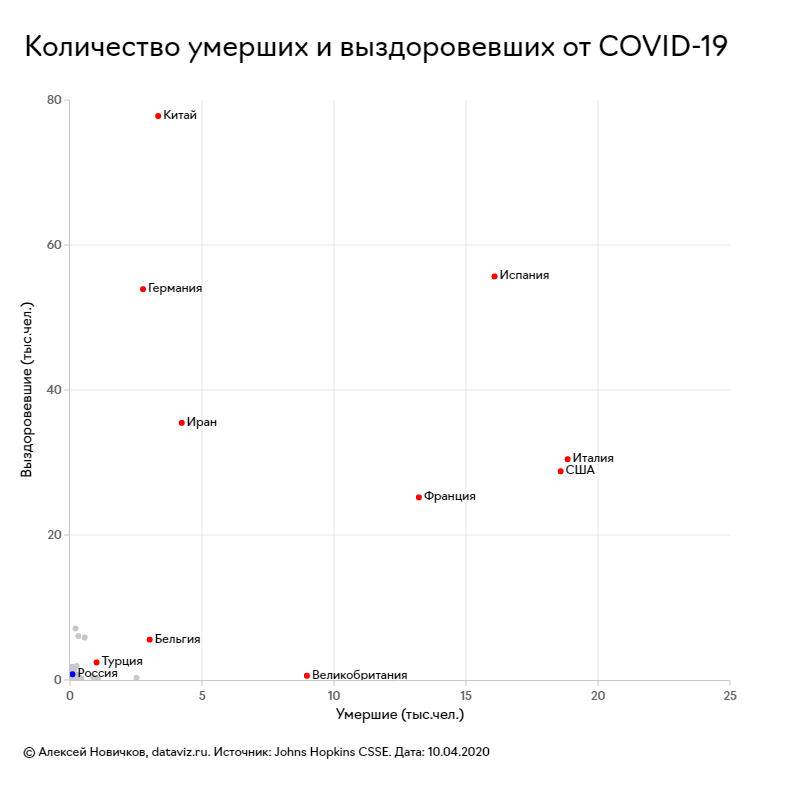

In [19]:
fig.write_image("images/covid19-Confirmedanddeath-"+ date2 +".png", scale = 3)
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)